In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load data
df = pd.read_csv("Downloads/StudentsPerformance.csv")

In [5]:
# Create 'average score' and 'Passed' columns
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['Passed'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

In [6]:
# Encode categorical variables
df_encoded = pd.get_dummies(df.drop(['average_score'], axis=1), drop_first=True)


In [7]:
# Split features and target
X = df_encoded.drop("Passed", axis=1)
y = df_encoded["Passed"]

In [8]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       173

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



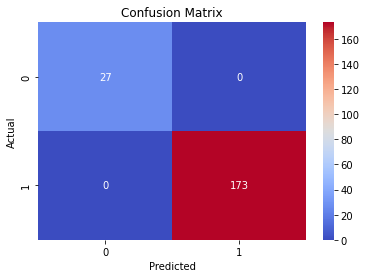

In [11]:
# Optional: Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()